# DAL Assignment

**WELLINGTON DANIEL**

In [ ]:
library(rpart)
library(rpart.plot)
library(ROCR)

In [ ]:
data=read.csv("datachurn.csv")

## Exploratory Data Analysis

In [ ]:
summary(data)

       ID            Age           Churn          CHI._Score_0   
 Min.   :   1   Min.   : 0.0   Min.   :0.00000   Min.   :  0.00  
 1st Qu.:1588   1st Qu.: 5.0   1st Qu.:0.00000   1st Qu.: 24.50  
 Median :3174   Median :11.0   Median :0.00000   Median : 87.00  
 Mean   :3174   Mean   :13.9   Mean   :0.05089   Mean   : 87.32  
 3rd Qu.:4760   3rd Qu.:20.0   3rd Qu.:0.00000   3rd Qu.:139.00  
 Max.   :6347   Max.   :67.0   Max.   :1.00000   Max.   :298.00  
 CHI_Score_.0.1       Support_0        Support_0.1              SP_0       
 Min.   :-125.000   Min.   : 0.0000   Min.   :-29.000000   Min.   :0.0000  
 1st Qu.:  -8.000   1st Qu.: 0.0000   1st Qu.:  0.000000   1st Qu.:0.0000  
 Median :   0.000   Median : 0.0000   Median :  0.000000   Median :0.0000  
 Mean   :   5.059   Mean   : 0.7063   Mean   : -0.006932   Mean   :0.8128  
 3rd Qu.:  15.000   3rd Qu.: 1.0000   3rd Qu.:  0.000000   3rd Qu.:2.6667  
 Max.   : 208.000   Max.   :32.0000   Max.   : 31.000000   Max.   :4.0000  
     S

In [ ]:
str(data)

'data.frame':	6347 obs. of  13 variables:
 $ ID                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age                : int  67 67 55 63 57 58 57 46 56 56 ...
 $ Churn              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CHI._Score_0       : int  0 62 0 231 43 138 180 116 78 78 ...
 $ CHI_Score_.0.1     : int  0 4 0 1 -1 -10 -5 -11 -7 -37 ...
 $ Support_0          : int  0 0 0 1 0 0 1 0 1 0 ...
 $ Support_0.1        : int  0 0 0 -1 0 0 1 0 -2 0 ...
 $ SP_0               : num  0 0 0 3 0 0 3 0 3 0 ...
 $ SP_0.1             : num  0 0 0 0 0 0 3 0 0 0 ...
 $ Logins_0.1         : int  0 0 0 167 0 43 13 0 -9 -7 ...
 $ Blog_0.1           : int  0 0 0 -8 0 0 -1 0 1 0 ...
 $ Views_0.1          : int  0 -16 0 21996 9 -33 907 38 0 30 ...
 $ Days_Last_Login_0.1: int  31 31 31 0 31 0 0 6 7 14 ...


In [ ]:
sum(is.na(data))

[1] 0

**Age**

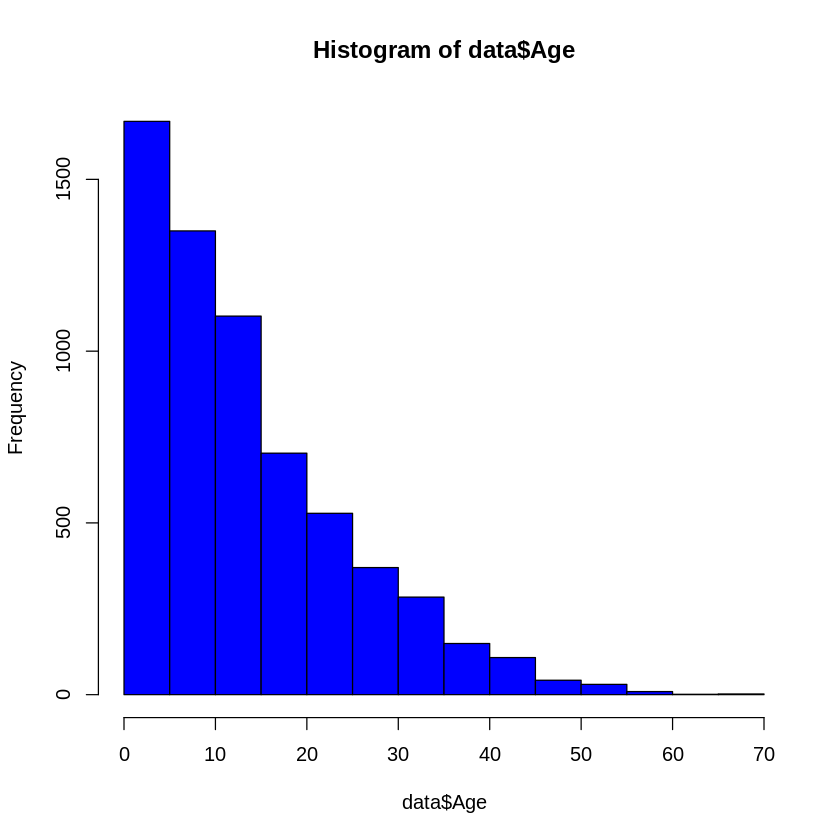

In [ ]:
hist(data$Age,col="blue")

**Churn**

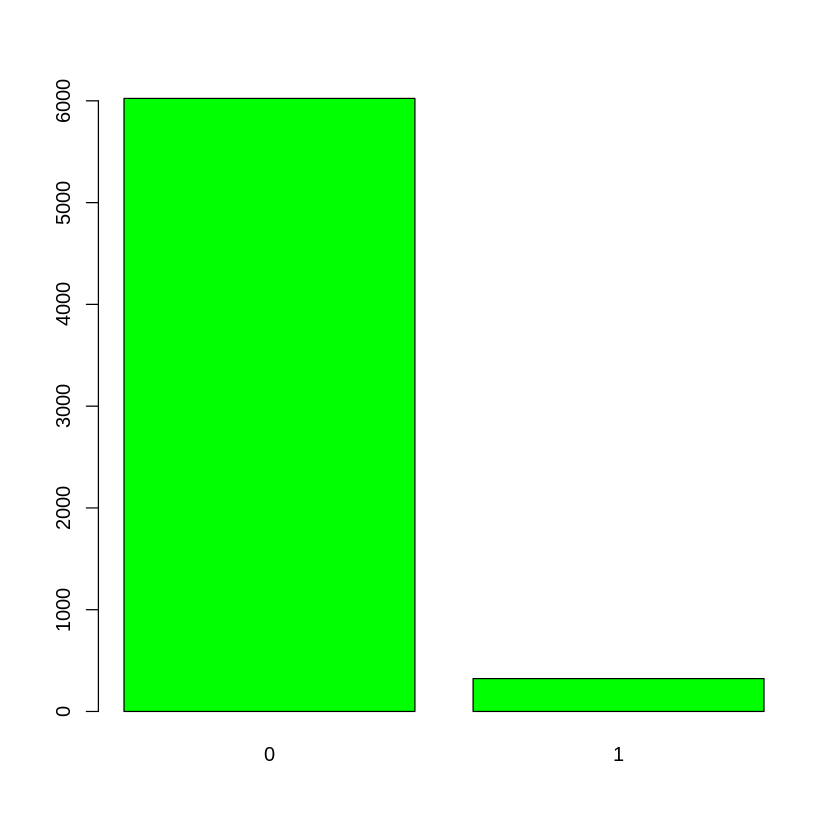

In [ ]:
plot(as.factor(data$Churn),col="green")

**Customer Hapiness Index**

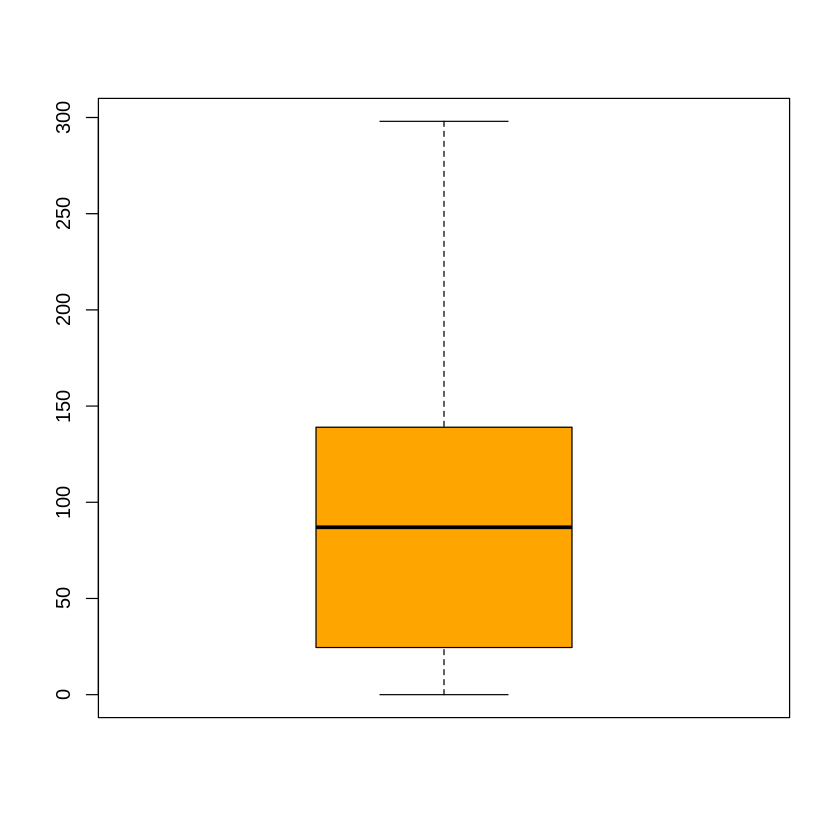

In [ ]:
boxplot(data$CHI._Score_0,col="orange")

**Customer Hapiness Index Change**

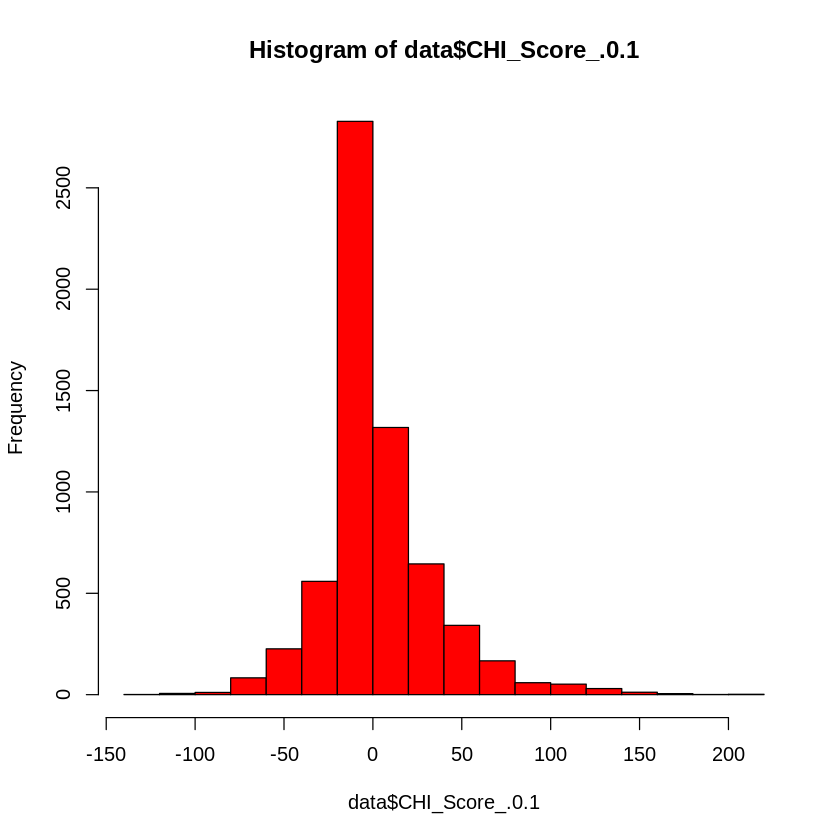

In [ ]:
hist(data$`CHI_Score_.0.1`,col="Red")

**Support**

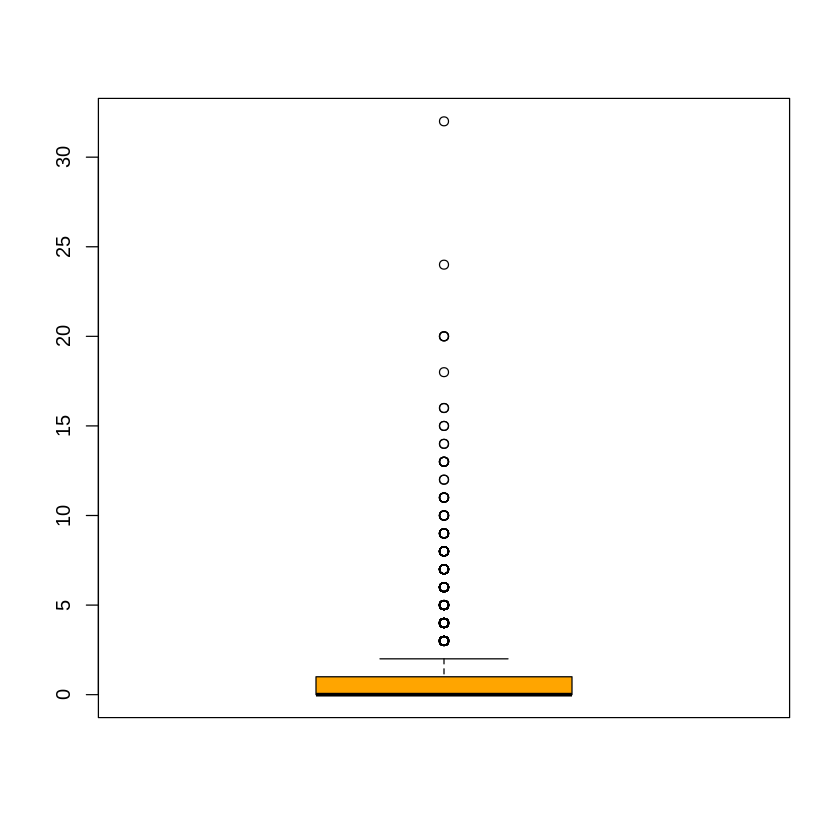

In [ ]:
boxplot(data$Support_0,col="orange")

**Change in Support**

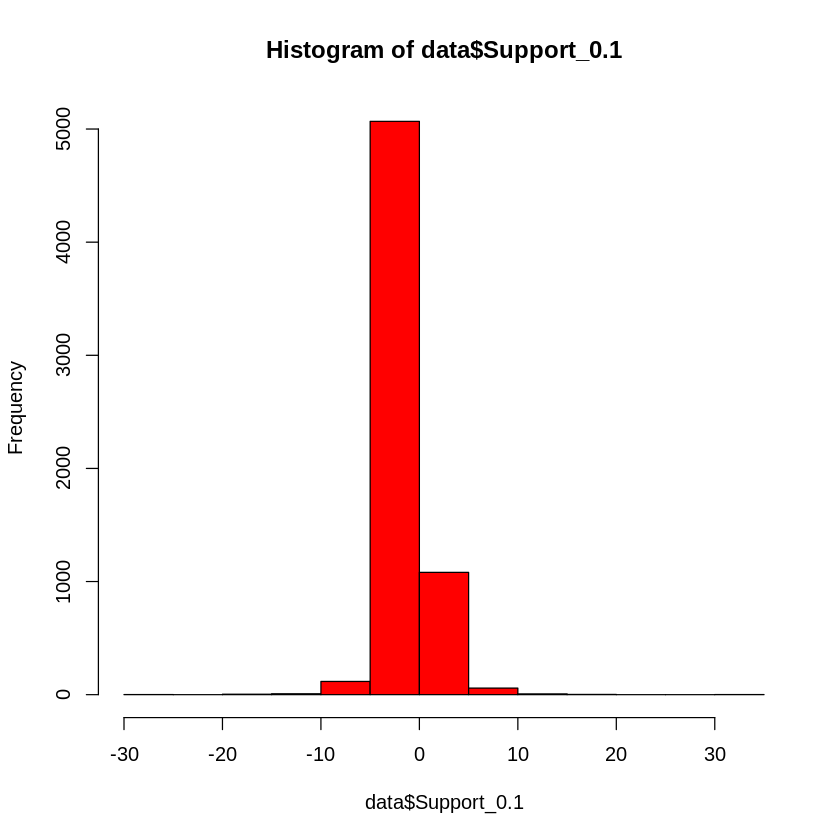

In [ ]:
hist(data$`Support_0.1`,col="Red")

## Logistic Regression

**Model Fitting**

In [ ]:
l <- glm(Churn ~. , family = binomial(link = 'logit'), data = data)
summary(l)


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8723  -0.3403  -0.2645  -0.2033   3.1769  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -8.476e-01  2.029e-01  -4.176 2.96e-05 ***
ID                  -4.102e-04  3.991e-05 -10.279  < 2e-16 ***
Age                 -2.324e-02  6.495e-03  -3.579 0.000346 ***
CHI._Score_0        -7.710e-03  1.250e-03  -6.166 7.00e-10 ***
CHI_Score_.0.1      -7.057e-03  2.532e-03  -2.787 0.005317 ** 
Support_0           -1.098e-01  1.032e-01  -1.064 0.287402    
Support_0.1          1.297e-01  8.958e-02   1.447 0.147803    
SP_0                 3.486e-04  1.018e-01   0.003 0.997267    
SP_0.1              -3.007e-02  7.801e-02  -0.385 0.699910    
Logins_0.1           5.686e-04  2.209e-03   0.257 0.796865    
Blog_0.1             3.361e-03  2.086e-02   0.161 0.872005    
Views_0.1           -9.431e-05  4.2

**Prediction**

In [ ]:
predict <- predict(l, type = 'response', newdata=data)

**ROC curve**

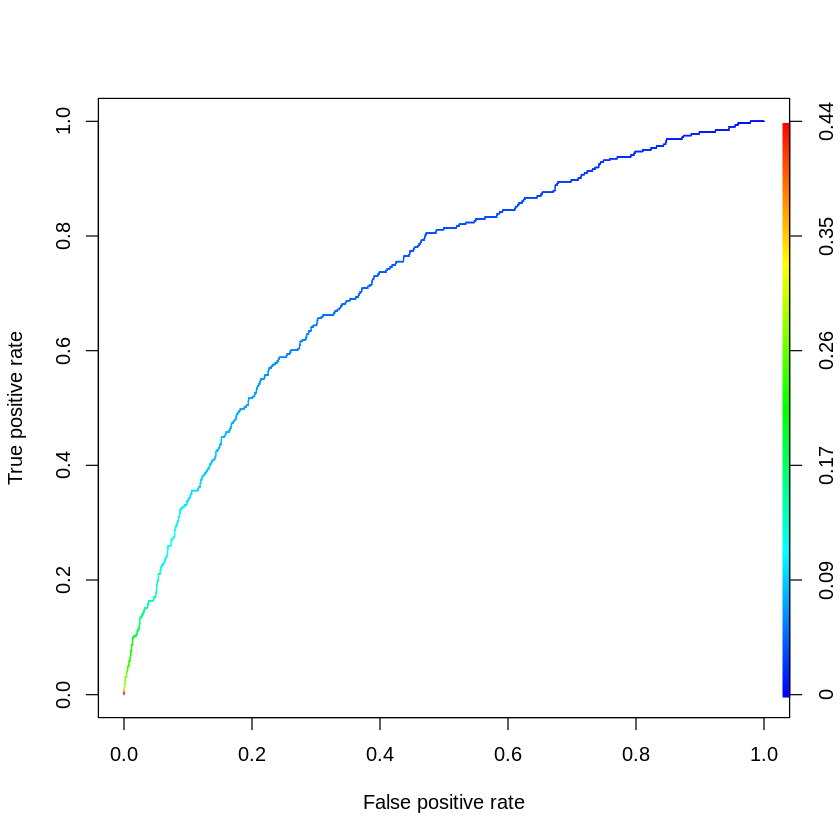

In [ ]:
pred0 <- prediction(predict, data$Churn)
perf <- performance(pred0, 'tpr','fpr')
plot(perf, colorize = TRUE, text.adj = c(-0.2,1.7))

## Decision Tree

**Changing churn to a factor and Model Fit**

In [ ]:
data2<-data
data2$Churn<-as.factor(data2$Churn)

In [ ]:
fit <- rpart(Churn~., data = data2[,-1],parms = list(split="gini"),control = rpart.control(minsplit = 3,cp = 0.00))

In [ ]:
printcp(fit)


Classification tree:
rpart(formula = Churn ~ ., data = data2[, -1], parms = list(split = "gini"), 
    control = rpart.control(minsplit = 3, cp = 0))

Variables actually used in tree construction:
 [1] Age                 Blog_0.1            CHI_Score_.0.1     
 [4] CHI._Score_0        Days_Last_Login_0.1 Logins_0.1         
 [7] SP_0                SP_0.1              Support_0          
[10] Support_0.1         Views_0.1          

Root node error: 323/6347 = 0.05089

n= 6347 

           CP nsplit rel error  xerror     xstd
1  0.00464396      0   1.00000 1.00000 0.054207
2  0.00309598      8   0.92879 0.99381 0.054048
3  0.00285782     28   0.86687 1.11455 0.057052
4  0.00247678     46   0.81424 1.21053 0.059303
5  0.00240798     82   0.70279 1.23839 0.059937
6  0.00232198     96   0.66563 1.25077 0.060215
7  0.00206398    104   0.64706 1.29721 0.061246
8  0.00176913    160   0.51084 1.37461 0.062913
9  0.00154799    170   0.49226 1.57276 0.066929
10 0.00132685    253   0.35913 1.6

**Pruning**

In [ ]:
pfit<-prune(fit,cp=0.01)

In [ ]:
fit$cptable[which.min(fit$cptable[,4]),1]

[1] 0.003095975

In [ ]:
pfit<-prune(fit,cp=0.00309597523219814)

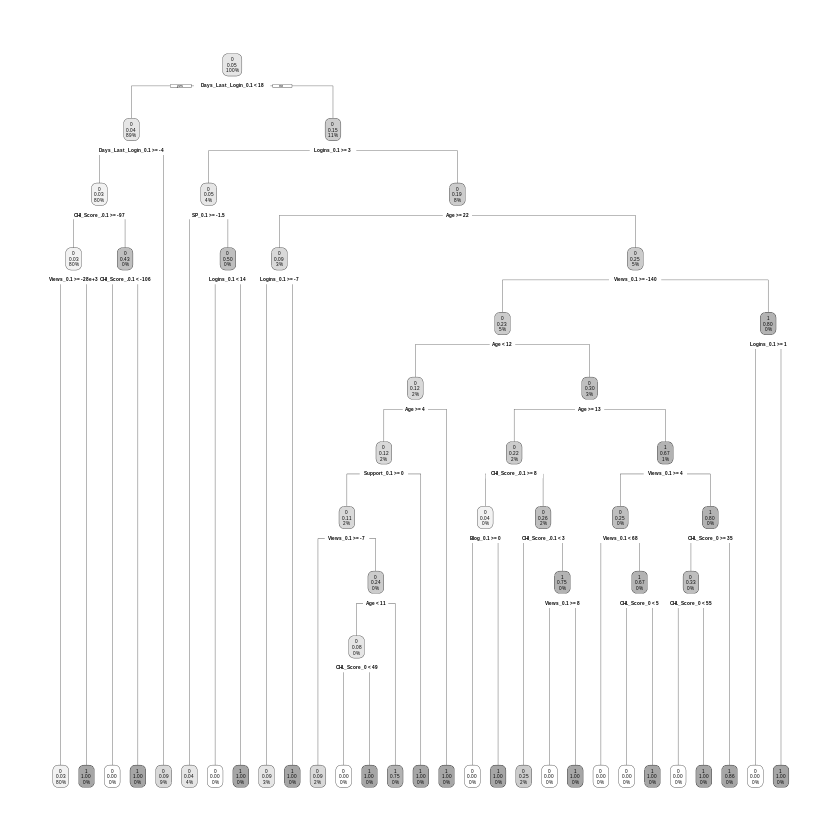

In [ ]:
rpart.plot(pfit, box.palette="Grays",type=2,tweak=1.1)

**ROC curve**

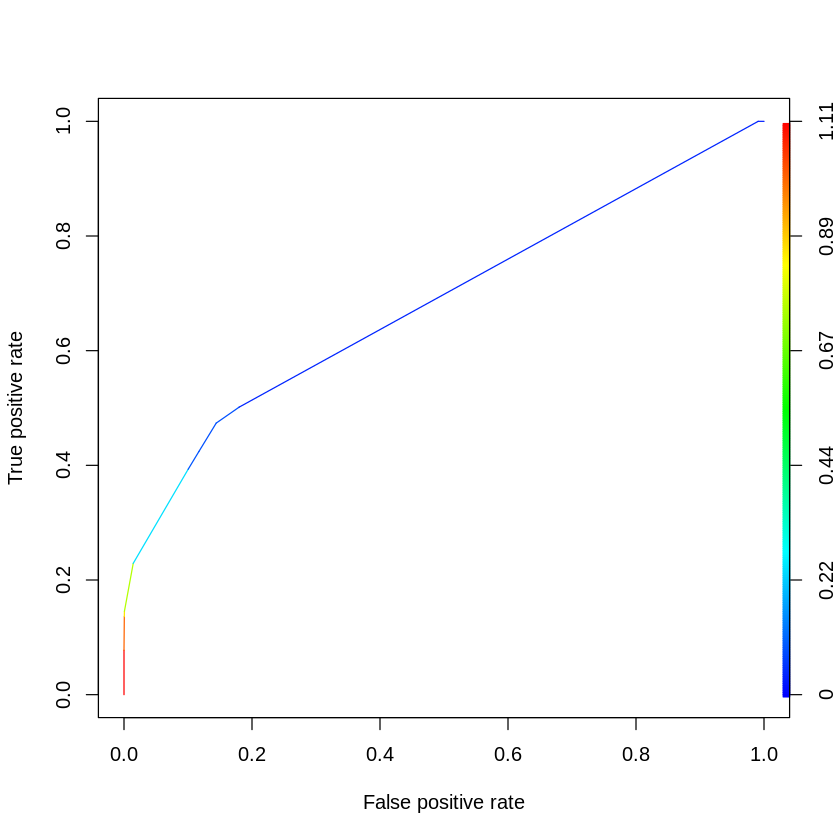

In [ ]:
pred <- prediction(predict(pfit, type = "prob")[, 2], data$Churn)
plot(performance(pred, "tpr", "fpr"), colorize = TRUE, text.adj = c(-0.2,1.7))

## Comparing the Two

**ROC Curves**

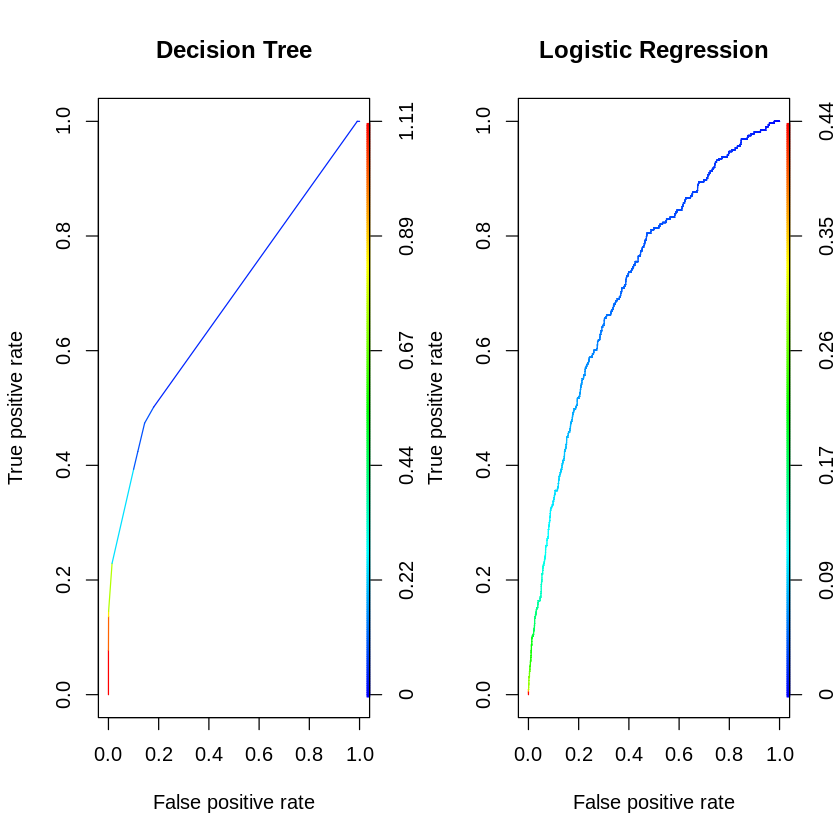

In [ ]:
par(mfrow=c(1,2))
plot(performance(pred, "tpr", "fpr"), colorize = TRUE, text.adj = c(-0.2,1.7),main="Decision Tree")
plot(perf, colorize = TRUE, text.adj = c(-0.2,1.7),main="Logistic Regression")

**Area Under the curve**

In [ ]:
  auc_DT <- performance(pred, measure = "auc")
  auc_DT <- auc_DT@y.values[[1]]
  auc_DT

[1] 0.683794

In [ ]:
  auc_LR <- performance(pred0, measure = "auc")
  auc_LR <- auc_LR@y.values[[1]]
  auc_LR

[1] 0.7252466

Logistic Regression has greater AUC. Therefore it is better.